## FrozenLake: Dynamic Programming Methods in a Stochastic Environment

### Overview
This notebook presents a comparative study of **Value Iteration (VI)** and **Policy Iteration (PI)** applied to the classic **FrozenLake-v1** environment from OpenAI Gym. FrozenLake is a small, discrete **Markov Decision Process (MDP)** with stochastic transitions, making it a suitable benchmark for analyzing exact planning algorithms under uncertainty.

### Environment Setup
- **Environment:** `FrozenLake-v1`
- **Map Size:** 4×4
- **Dynamics:** Stochastic (`is_slippery=True`)
- **State Space:** 16 discrete states
- **Action Space:** 4 actions (Left, Down, Right, Up)

The stochasticity introduced by slippery transitions means that actions do not always lead to their intended outcomes, which directly impacts convergence behavior and policy robustness.

### Objectives
The goals of this notebook are to:
1. Implement **Value Iteration** and **Policy Iteration** from scratch using the environment’s transition model.
2. Compare their **convergence characteristics** and **state-value estimates**.
3. Visualize learned value functions using **heatmaps**.
4. Evaluate the learned policies based on **empirical success rates** over multiple episodes.

### Methodology
Both algorithms rely on full access to the environment’s transition probabilities (`env.P`) and discount future rewards to compute optimal value functions and policies. Results are analyzed quantitatively and visually to highlight differences in convergence speed, stability, and performance under stochastic dynamics.


### Imports

In [1]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from algorithms.value_iteration import value_iteration
from algorithms.policy_iteration import policy_iteration
from utils.utils import evaluate_policy, plot_convergence, plot_heatmap

### Create "FrozenLake" Environment


In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True, map_name="4x4")
env.reset()
print("States:", env.observation_space.n)
print("Actions:", env.action_space.n)

States: 16
Actions: 4


### Random Actions in Env

In [6]:
import time
from IPython.display import clear_output

state = env.reset()

done = False
step = 0

while not done:
    clear_output(wait=True)

    # Render ANSI text
    print(env.render(mode="ansi"))

    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print(f"Step: {step}")
    print(f"State: {state} -> {next_state}")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Done: {done}")

    state = next_state
    step += 1
    time.sleep(0.6)

env.close()
print("Episode finished.")

  (Left)
SFFF
FHFH
FFFH
HFFG

Step: 3
State: 4 -> 5
Action: 1
Reward: 0.0
Done: True
Episode finished.


### Running "*Value Iteration*"

In [7]:
policy_vi, V_vi, iterations_vi, time_taken_vi, deltas_vi = value_iteration(env, gamma=0.99, theta=1e-8, max_iterations=10000)
print("Value Iteration Completed")
print("VI State Values:\n", V_vi.reshape(int(np.sqrt(len(V_vi))), -1))

Value Iteration Completed
VI State Values:
 [[0.54202577 0.49880297 0.47069543 0.45685142]
 [0.55845081 0.         0.35834796 0.        ]
 [0.59179862 0.64307973 0.61520747 0.        ]
 [0.         0.74172037 0.86283739 0.        ]]


### Running "*Policy Iteration*"

In [8]:
policy_pi, V_pi, iterations_pi, time_taken_pi, deltas_pi = policy_iteration(env, gamma=0.99, theta=1e-8, max_iterations=10000)
print("Policy Iteration Completed")
print("PI State Values:\n", V_pi.reshape(int(np.sqrt(len(V_pi))), -1))

Policy Iteration Completed
PI State Values:
 [[0.54202581 0.49880303 0.4706955  0.4568515 ]
 [0.55845085 0.         0.35834799 0.        ]
 [0.59179866 0.64307976 0.6152075  0.        ]
 [0.         0.7417204  0.86283741 0.        ]]


### Plotting State-Values Heatmap

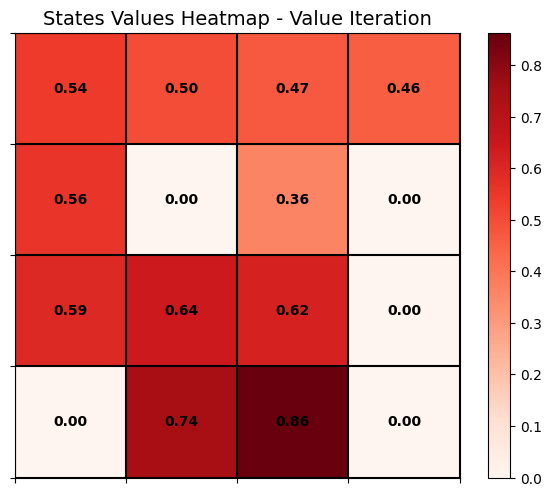

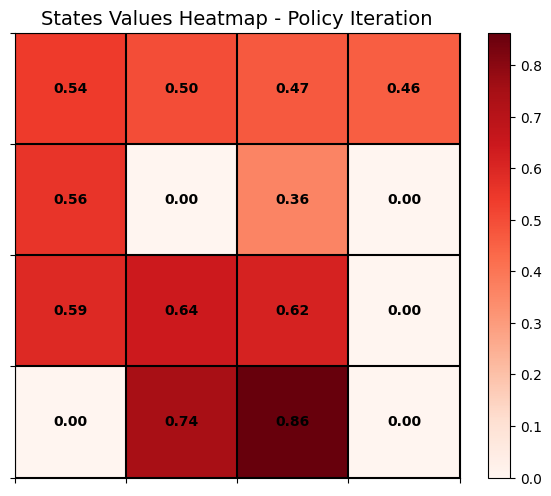

In [9]:
plot_heatmap(V_vi, title="States Values Heatmap - Value Iteration")
plot_heatmap(V_pi, title="States Values Heatmap - Policy Iteration")

### Table of Comparison

In [10]:
from tabulate import tabulate
success_vi = evaluate_policy(env, policy_vi, num_episodes=500)
success_pi = evaluate_policy(env, policy_pi, num_episodes=500)

data = [
        ["Iterations", iterations_pi, iterations_vi],
        ["Time (seconds)", round(time_taken_pi, 4), round(time_taken_vi, 4)],
        ["Success Rate", f"{success_pi:.1f}%", f"{success_vi:.1f}%"],
    ]

print("=" * 50)
print("Algorithm Comparison on FrozenLake 4x4 Environment")
print("=" * 50)
print(tabulate(data, headers=["Metric", "Policy Iteration", "Value Iteration"], tablefmt="grid"))
print("=" * 50)

Algorithm Comparison on FrozenLake 4x4 Environment
+----------------+--------------------+-------------------+
| Metric         | Policy Iteration   | Value Iteration   |
+================+====================+===================+
| Iterations     | 7                  | 438               |
+----------------+--------------------+-------------------+
| Time (seconds) | 0.0648             | 0.4567            |
+----------------+--------------------+-------------------+
| Success Rate   | 73.0%              | 79.4%             |
+----------------+--------------------+-------------------+


### Plotting Convergence Rate

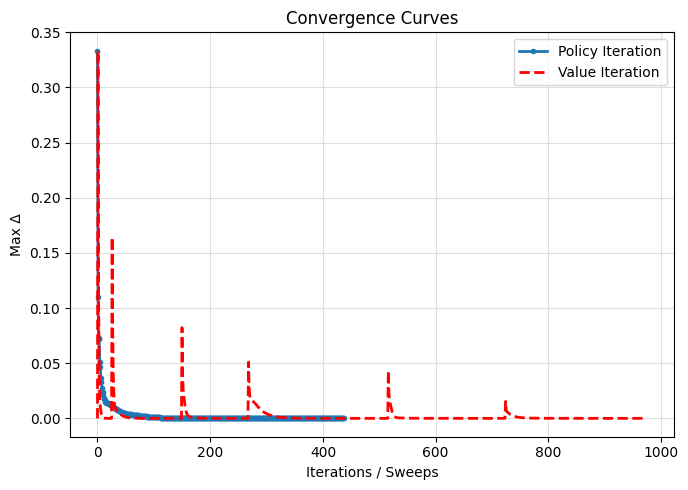

In [11]:
plot_convergence(deltas_vi, deltas_pi)

## Conclusion

In this notebook, we evaluated **Value Iteration** and **Policy Iteration** on the stochastic FrozenLake environment and analyzed their behavior through convergence metrics, value-function visualizations, and empirical success rates.

### Key Observations

- **Convergence Behavior:**  
  Value Iteration exhibited a smoother but more gradual convergence, as reflected in the decreasing Bellman residuals. Policy Iteration converged in fewer outer iterations but required solving a policy evaluation step at each iteration, making individual iterations computationally heavier.

- **State-Value Structure:**  
  The heatmaps for both methods revealed similar value landscapes, with higher values concentrated near the goal state and significantly lower values around hole states. Minor discrepancies between VI and PI values are expected due to finite convergence thresholds and stochastic transitions.

- **Policy Performance:**  
  When evaluated over multiple episodes, both learned policies achieved comparable success rates. However, the stochastic nature of the environment (`is_slippery=True`) limits the maximum achievable performance, even under an optimal policy.

### Takeaways

- Both **Value Iteration** and **Policy Iteration** reliably solve small, fully-known MDPs such as FrozenLake.
- **Value Iteration** is conceptually simpler and more flexible for approximate settings.
- **Policy Iteration** often converges faster in theory but can be more expensive per iteration.
- Environmental stochasticity plays a critical role in shaping value estimates and achievable performance.

Overall, this experiment demonstrates how classic dynamic programming methods behave in a controlled yet non-deterministic environment and provides a strong foundation for extending these ideas to larger or model-free reinforcement learning settings.
